# Machine Learning 1, Übung 1
(c) 2023 by Harald Bögeholz

Der unten stehende Code erzeugt einige pseudo-zufällige Datenpunkte. Sehen Sie sich die Inhalte der Variablen an.

In [95]:
import numpy as np

np.random.seed(42)
m = 20
x = np.random.rand(m) * 10
y = 3.5 * x + 10 + np.random.randn(m) * 5
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ])

In [96]:
y

array([18.04474856, 44.84623739, 31.07966759, 23.89152844, 22.78889626,
       14.33092671, 12.37056745, 33.19242417, 28.31711179, 35.33715317,
        4.96548941, 45.82533492, 36.13229898, 15.97340012, 13.35534079,
       25.68054877, 20.58099238, 23.07792046, 29.23080021, 14.08880166])

Ein paar Zeilen Code zur Vorbereitung des Folgenden:

In [97]:
import math
import matplotlib.pyplot as plt

linX = np.array([0,10])
y_range = max(y) - min(y)
y_min = min(y) - 0.1 * y_range
y_max = max(y) + 0.1 * y_range

Die folgenden Werte sind von Hand geschätzt:

In [98]:
theta_0 = 10.25
theta_1 = 3.25

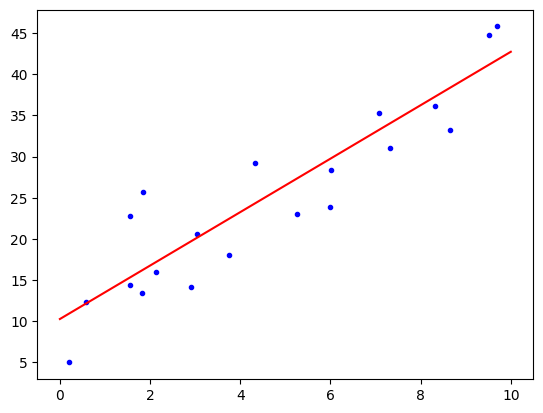

In [99]:
plt.plot(x,y,"b.")
plt.plot(linX, theta_0+linX*theta_1, "r-")

Der Vektor `x` enthält die Eingabedaten

In [100]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ])

Der Vektor `y` enthält die zugehörigen Ausgabedaten:

In [101]:
y

array([18.04474856, 44.84623739, 31.07966759, 23.89152844, 22.78889626,
       14.33092671, 12.37056745, 33.19242417, 28.31711179, 35.33715317,
        4.96548941, 45.82533492, 36.13229898, 15.97340012, 13.35534079,
       25.68054877, 20.58099238, 23.07792046, 29.23080021, 14.08880166])

Das lineare Modell liefert folgende Werte (man beachte: numpy kann einen Vektor `x` mit einer Zahl `theta_1` komponentenweise multiplizieren)

In [102]:
theta_0 + x * theta_1

array([22.42255386, 41.14821496, 34.03980311, 29.70640074, 15.32060581,
       15.31982191, 12.1377174 , 38.40072474, 29.78623788, 33.26235878,
       10.91899606, 41.7720702 , 37.30438583, 17.1510211 , 16.15931143,
       16.21064657, 20.1378729 , 27.30458403, 24.28821311, 19.71494706])

Der Fehler ist die Differenz zwischen dem Modell und den tatsächlichen Werten in `y`. Es gibt positive und negative Abweichungen (die Gerade verläuft über oder unter den Datenpunkten)

In [103]:
theta_0 + x * theta_1 - y

array([ 4.3778053 , -3.69802243,  2.96013552,  5.8148723 , -7.46829045,
        0.9888952 , -0.23285005,  5.20830057,  1.46912609, -2.07479439,
        5.95350665, -4.05326472,  1.17208685,  1.17762097,  2.80397064,
       -9.4699022 , -0.44311948,  4.22666357, -4.94258711,  5.6261454 ])

Wir quadrieren den Fehler. Dann sind alle Werte positiv.

In [104]:
(theta_0 + x * theta_1 - y) ** 2

array([1.91651793e+01, 1.36753699e+01, 8.76240231e+00, 3.38127398e+01,
       5.57753622e+01, 9.77913720e-01, 5.42191476e-02, 2.71263948e+01,
       2.15833148e+00, 4.30477177e+00, 3.54442414e+01, 1.64289549e+01,
       1.37378758e+00, 1.38679115e+00, 7.86225137e+00, 8.96790476e+01,
       1.96354877e-01, 1.78646849e+01, 2.44291673e+01, 3.16535121e+01])

So können wir den mittleren quadratischen Fehler (MSE) berechnen:

In [105]:
np.sum((theta_0 + x * theta_1 - y) ** 2) / m

19.606573880949234

In [106]:
X = np.c_[np.ones(m), x]
X

array([[1.        , 3.74540119],
       [1.        , 9.50714306],
       [1.        , 7.31993942],
       [1.        , 5.98658484],
       [1.        , 1.5601864 ],
       [1.        , 1.5599452 ],
       [1.        , 0.58083612],
       [1.        , 8.66176146],
       [1.        , 6.01115012],
       [1.        , 7.08072578],
       [1.        , 0.20584494],
       [1.        , 9.69909852],
       [1.        , 8.32442641],
       [1.        , 2.12339111],
       [1.        , 1.81824967],
       [1.        , 1.8340451 ],
       [1.        , 3.04242243],
       [1.        , 5.24756432],
       [1.        , 4.31945019],
       [1.        , 2.9122914 ]])

In [107]:
theta_best = np.linalg.inv(X.T @ X) @ X.T @ y
theta_best
theta_0, theta_1 = theta_best

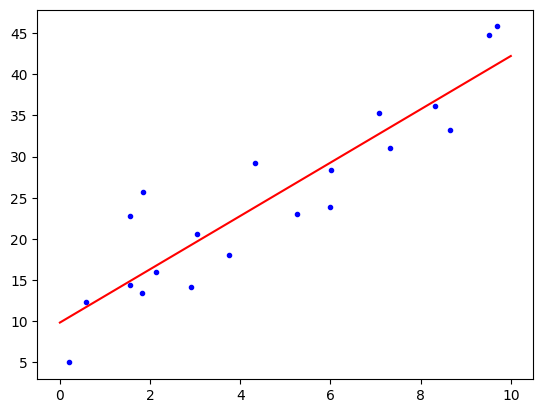

In [108]:
plt.plot(x,y,"b.")
plt.plot(linX, theta_0+linX*theta_1, "r-")

In [109]:
np.sum((theta_0 + x * theta_1 - y) ** 2) / m

19.385233111742174